## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## import dataset

In [2]:
df = pd.read_csv('Titanic.tsv', sep = '\t')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  894 non-null    int64  
 1   Survived     894 non-null    int64  
 2   Pclass       894 non-null    float64
 3   Name         894 non-null    object 
 4   Sex          894 non-null    object 
 5   Age          721 non-null    object 
 6   SibSp        894 non-null    int64  
 7   Parch        894 non-null    object 
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    object 
 10  Cabin        208 non-null    object 
 11  Embarked     892 non-null    object 
 12  ship         894 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 90.9+ KB


In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic
5,6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,"8,4583",NaN,Q,Titanic
6,7,0,1.0,"McCarthy, Mr. Timothy J",male,54,0,0,17463,"51,8625",E46,S,Titanic
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,"21,075",NaN,S,Titanic
8,9,1,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,"11,1333",NaN,S,Titanic
9,10,1,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,"30,0708",NaN,C,Titanic


## Find duplicates

In [5]:
df['PassengerId'].duplicated().sum()

4

In [6]:
df[df['PassengerId'].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
13,11,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S,Titanic
23,11,1,3.0,"Sandstrom, Miss. Marguerite Ru&5$$",female,4,1,1,PP 9549,"16,7",G6,S,Titanic
520,225,1,1.0,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S,Titanic
678,225,1,1.0,"Hoytt, Mr. Frederick Maxfield",male,38,1,0,19943,90,C93,S,Titanic


In [7]:
df_titanic = df.drop_duplicates(subset=['PassengerId'])


In [8]:
df_titanic['PassengerId'].duplicated().sum()

0

## handling missing values

In [9]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           1
Fare             1
Cabin          686
Embarked         2
ship             0
dtype: int64

In [10]:
print(df_titanic.isnull().mean())

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.194382
SibSp          0.000000
Parch          0.000000
Ticket         0.001124
Fare           0.001124
Cabin          0.770787
Embarked       0.002247
ship           0.000000
dtype: float64


In [11]:
df_titanic[df_titanic['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3.0,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
2,3,1,3.0,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
4,5,0,3.0,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic
5,6,0,3.0,"Moran, Mr. James",male,NaN,0,0,330877,"8,4583",NaN,Q,Titanic
7,8,0,3.0,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,"21,075",NaN,S,Titanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3.0,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,"29,125",NaN,Q,Titanic
886,887,0,2.0,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S,Titanic
888,889,0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,"23,45",NaN,S,Titanic
890,891,0,3.0,"Dooley, Mr. Patrick",male,32,0,0,370376,"7,75",NaN,Q,Titanic


### filling missing values

In [12]:
df_titanic['Age'].fillna("0",axis=0,inplace=True)
df_titanic['Cabin'].fillna("Unknown",axis=0,inplace=True)
df_titanic['Ticket'].fillna("Unknown",axis=0,inplace=True)
df_titanic['Fare'].fillna(0,axis=0,inplace=True)
df_titanic['Embarked'].fillna("Unknown",axis=0,inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    float64
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    object 
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    object 
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    object 
 10  Cabin        890 non-null    object 
 11  Embarked     890 non-null    object 
 12  ship         890 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 97.3+ KB


In [13]:
df_titanic1 = df_titanic.copy()
#df_titanic1.dropna(axis=0, inplace=True)
#df_titanic1.isna().sum()

In [14]:
df_titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    float64
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    object 
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    object 
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    object 
 10  Cabin        890 non-null    object 
 11  Embarked     890 non-null    object 
 12  ship         890 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 97.3+ KB


## change the data types

### Pclass

In [15]:

df_titanic1['Pclass'] = df_titanic1['Pclass'].astype(int)

df_titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  890 non-null    int64 
 1   Survived     890 non-null    int64 
 2   Pclass       890 non-null    int64 
 3   Name         890 non-null    object
 4   Sex          890 non-null    object
 5   Age          890 non-null    object
 6   SibSp        890 non-null    int64 
 7   Parch        890 non-null    object
 8   Ticket       890 non-null    object
 9   Fare         890 non-null    object
 10  Cabin        890 non-null    object
 11  Embarked     890 non-null    object
 12  ship         890 non-null    object
dtypes: int64(4), object(9)
memory usage: 97.3+ KB


### Parch

In [16]:

df_titanic1[df_titanic['Parch'].str.contains('no')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
376,377,1,3,"Landergren, Miss. Aurora Adelia",female,22,0,no,C 7077,"7,25",Unknown,S,Titanic


In [17]:
#changing the value "no" with 0
df_titanic1['Parch'].replace({'no':'0'}, inplace=True)


In [18]:
df_titanic1['Parch'] = df_titanic1['Parch'].astype(int)
df_titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  890 non-null    int64 
 1   Survived     890 non-null    int64 
 2   Pclass       890 non-null    int64 
 3   Name         890 non-null    object
 4   Sex          890 non-null    object
 5   Age          890 non-null    object
 6   SibSp        890 non-null    int64 
 7   Parch        890 non-null    int64 
 8   Ticket       890 non-null    object
 9   Fare         890 non-null    object
 10  Cabin        890 non-null    object
 11  Embarked     890 non-null    object
 12  ship         890 non-null    object
dtypes: int64(5), object(8)
memory usage: 97.3+ KB


### Age

In [19]:
#df_titanic1['Age'] = pd.to_numeric(df_titanic1['Age'], errors="ignore")
#df_titanic1.info()

In [20]:
df_titanic1[['Age']]

,Age
0,22
1,38
2,26
3,35
4,35
...,...
889,26
890,32
891,38
892,4


### manipulate string and repairing the dataset

In [21]:
s = df_titanic1['Age'].str.find(',')
s

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
889   -1
890   -1
891   -1
892   -1
893   -1
Name: Age, Length: 890, dtype: int64

In [22]:
# find the age with decimal
df_titanic1[df_titanic1['Age'].str.find(',') > -1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
57,58,0,3,"Novel, Mr. Mansouer",male,"28,5",0,0,2697,"7,2292",Unknown,C,Titanic
78,79,1,2,"Caldwell, Master. Alden Gates",male,"0,83",0,2,248738,29,Unknown,S,Titanic
111,112,0,3,"Zabour, Miss. Hileni",female,"14,5",1,0,2665,"14,4542",Unknown,C,Titanic
116,117,0,3,"Connors, Mr. Patrick",male,"70,5",0,0,370369,"7,75",Unknown,Q,Titanic
122,123,0,2,"Nasser, Mr. Nicholas",male,"32,5",1,0,237736,"30,0708",Unknown,C,Titanic
123,124,1,2,"Webber, Miss. Susan",female,"32,5",0,0,27267,13,E101,S,Titanic
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,"36,5",0,2,230080,26,F2,S,Titanic
152,153,0,3,"Meo, Mr. Alfonzo",male,"55,5",0,0,A.5. 11206,"8,05",Unknown,S,Titanic
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,"40,5",0,2,A/5. 851,"14,5",Unknown,S,Titanic
203,204,0,3,"Youseff, Mr. Gerious",male,"45,5",0,0,2628,"7,225",Unknown,C,Titanic


In [23]:
df_titanic1['Age'] = df_titanic1['Age'].str.replace(',','.')


In [24]:
df_titanic1[df_titanic1['Age'].str.find('.') > -1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,.9,1,0,PC 17569,"146,5208",B78,C,Titanic
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,"7,2292",Unknown,C,Titanic
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,Unknown,S,Titanic
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,"14,4542",Unknown,C,Titanic
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,"7,75",Unknown,Q,Titanic
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,"30,0708",Unknown,C,Titanic
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13,E101,S,Titanic
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26,F2,S,Titanic
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,"8,05",Unknown,S,Titanic
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,"14,5",Unknown,S,Titanic


In [25]:
#Age
df_titanic1['Age'] = df_titanic1['Age'].astype(float)

df_titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Survived     890 non-null    int64  
 2   Pclass       890 non-null    int64  
 3   Name         890 non-null    object 
 4   Sex          890 non-null    object 
 5   Age          890 non-null    float64
 6   SibSp        890 non-null    int64  
 7   Parch        890 non-null    int64  
 8   Ticket       890 non-null    object 
 9   Fare         890 non-null    object 
 10  Cabin        890 non-null    object 
 11  Embarked     890 non-null    object 
 12  ship         890 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 97.3+ KB


In [26]:
df_titanic1['Age'] = np.round(df_titanic1['Age'])
df_titanic1.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30,C148,C,Titanic
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,"7,75",Unknown,Q,Titanic
891,1000,1,1,Mr. Frederick Maxfield Hoyt,male,38.0,1,0,19943,90,C93,S,Titanic
892,1143,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,"16,7",G6,S,Titanic
893,-12,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,1.0,0,0,350406,"7,8542",Unknown,S,Titanic


### Fare

In [27]:
df_titanic1[df_titanic1['Fare'].str.find('m') > -1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,07.maj,Unknown,S,Titanic


In [28]:
df_titanic1['Fare'] = df_titanic1['Fare'].str.replace(',','.')
#df_titanic1['Fare'] = df_titanic1['Fare'].str.replace('07.maj','0')

In [29]:
df_titanic1.drop(df_titanic1[df_titanic1['Fare'] == '07.maj'].index, inplace = True)

In [30]:
df_titanic1['Fare'] = df_titanic1['Fare'].astype(float)
df_titanic1['Fare'] = np.round(df_titanic1['Fare'],2)
df_titanic1.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Titanic
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Unknown,Q,Titanic
891,1000,1,1,Mr. Frederick Maxfield Hoyt,male,38.0,1,0,19943,90.00,C93,S,Titanic
892,1143,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,16.70,G6,S,Titanic
893,-12,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,1.0,0,0,350406,7.85,Unknown,S,Titanic


### PassengerId

In [31]:
df_titanic1['PassengerId'] = df_titanic1['PassengerId'].astype(str)

In [32]:
df_titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    object 
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
 12  ship         889 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 97.2+ KB


In [33]:
df_titanic1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,Unknown,S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,Unknown,S,Titanic
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,Titanic
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,Unknown,S,Titanic
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.46,Unknown,Q,Titanic
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S,Titanic
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.08,Unknown,S,Titanic
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,Unknown,S,Titanic
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,Unknown,C,Titanic


## Handling outlier

### Age

In [34]:
df_titanic1['Age'].describe()

count     889.000000
mean       28.925759
std       149.181525
min       -12.000000
25%         6.000000
50%        24.000000
75%        35.000000
max      4435.000000
Name: Age, dtype: float64

In [35]:
df_titanic1['Age'].replace({-12:12}, inplace=True)
df_titanic1['Age'].replace({-3:3}, inplace=True)
df_titanic1['Age'].describe()

count     889.000000
mean       28.959505
std       149.174970
min         0.000000
25%         6.000000
50%        24.000000
75%        35.000000
max      4435.000000
Name: Age, dtype: float64

In [36]:
# quartile 1 and 3
Q1 = df_titanic1['Age'].quantile(0.25)
Q3 = df_titanic1['Age'].quantile(0.75)

#IQR
IQR = Q3 - Q1
min_age = Q1 - 1.5 * IQR
max_age = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_age)
print('\nMax:\n',max_age)

Q1:
 6.0

Q3:
 35.0

IQR:
 29.0

Min:
 -37.5

Max:
 78.5


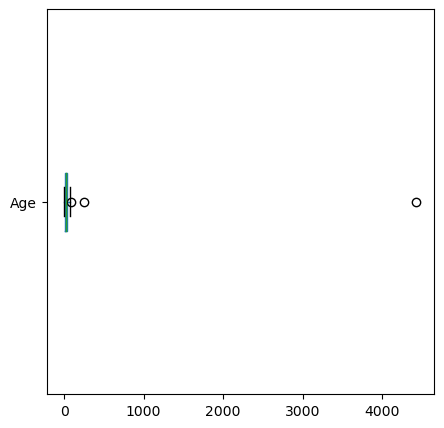

In [37]:
df_titanic1.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

In [38]:
df_titanic2 = df_titanic1.copy()

filter_age_min =df_titanic2['Age'] < min_age
filter_age_max = df_titanic2['Age'] > max_age

df_titanic2 = df_titanic2.loc[~(filter_age_min | filter_age_max)]

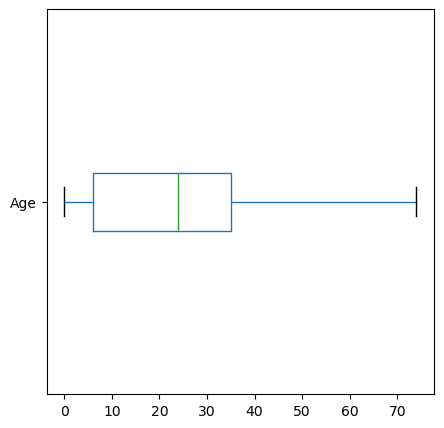

In [39]:
# boxplot without outlier 

df_titanic2.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

In [40]:
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    object 
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Sex          886 non-null    object 
 5   Age          886 non-null    float64
 6   SibSp        886 non-null    int64  
 7   Parch        886 non-null    int64  
 8   Ticket       886 non-null    object 
 9   Fare         885 non-null    float64
 10  Cabin        886 non-null    object 
 11  Embarked     886 non-null    object 
 12  ship         886 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 96.9+ KB


### Survived

In [41]:
df_titanic2['Survived'].describe()

count    886.000000
mean       0.379233
std        0.508213
min       -4.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

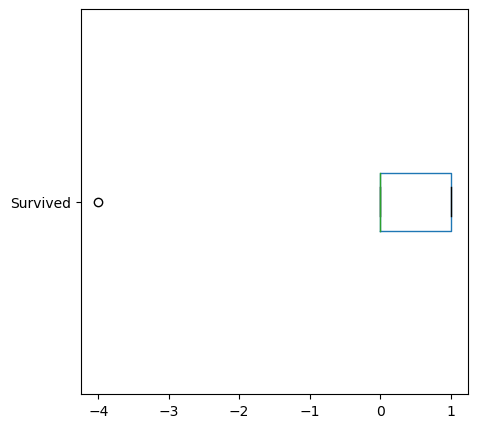

In [42]:
df_titanic1.boxplot(column=['Survived'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

In [43]:
# quartile 1 and 3
Q1 = df_titanic2['Survived'].quantile(0.25)
Q3 = df_titanic2['Survived'].quantile(0.75)

#IQR
IQR = Q3 - Q1
min_srv = Q1 - 1.5 * IQR
max_srv = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_srv)
print('\nMax:\n',max_srv)

Q1:
 0.0

Q3:
 1.0

IQR:
 1.0

Min:
 -1.5

Max:
 2.5


In [44]:
df_titanic3 = df_titanic2.copy()

filter_srv_min =df_titanic3['Survived'] < min_srv
filter_srv_max = df_titanic3['Survived'] > max_srv

df_titanic3 = df_titanic3.loc[~(filter_srv_min | filter_srv_max)]

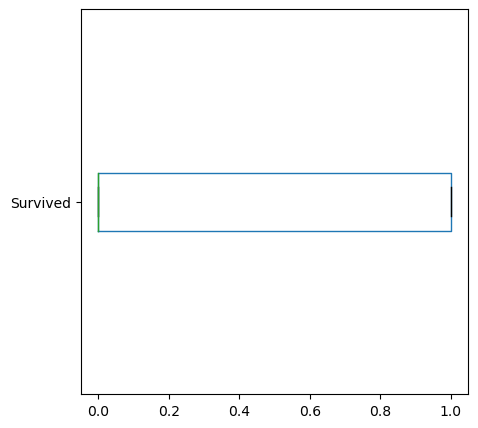

In [45]:
df_titanic3.boxplot(column=['Survived'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

### Pclass

In [46]:
df_titanic3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  885 non-null    object 
 1   Survived     885 non-null    int64  
 2   Pclass       885 non-null    int64  
 3   Name         885 non-null    object 
 4   Sex          885 non-null    object 
 5   Age          885 non-null    float64
 6   SibSp        885 non-null    int64  
 7   Parch        885 non-null    int64  
 8   Ticket       885 non-null    object 
 9   Fare         884 non-null    float64
 10  Cabin        885 non-null    object 
 11  Embarked     885 non-null    object 
 12  ship         885 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 96.8+ KB


In [47]:
df_titanic3['Pclass'].describe()

count    885.000000
mean       2.306215
std        0.846884
min       -2.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

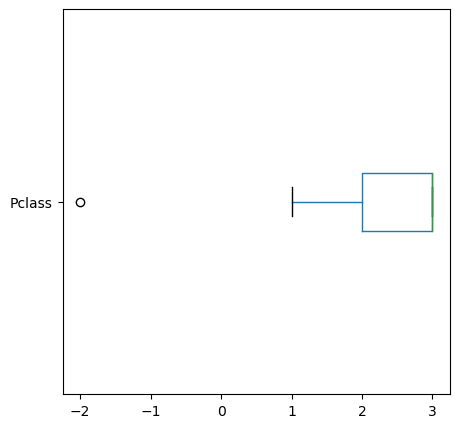

In [48]:
df_titanic3.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

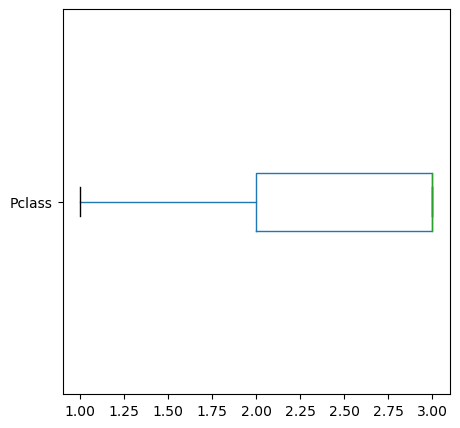

In [49]:
df_titanic3['Pclass'].replace({-2:2}, inplace=True)
df_titanic3['Pclass'].replace({-1:1}, inplace=True)
df_titanic3.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

### Fare

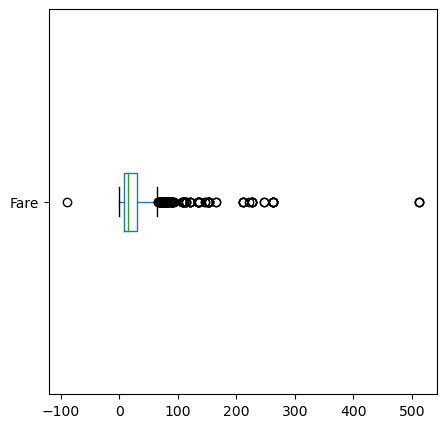

In [50]:
df_titanic3.boxplot(column=['Fare'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()


In [52]:
# quartile 1 and 3
Q1 = df_titanic3['Fare'].quantile(0.25)
Q3 = df_titanic3['Fare'].quantile(0.75)

#IQR
IQR = Q3 - Q1
min_fare = Q1 - 1.5 * IQR
max_fare = Q3 + 1.5 * IQR

print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',min_fare)
print('\nMax:\n',max_fare)

Q1:
 7.9

Q3:
 30.775

IQR:
 22.875

Min:
 -26.4125

Max:
 65.0875


In [53]:
df_titanic4 = df_titanic3.copy()

filter_fare_min = df_titanic4['Fare'] < min_fare
filter_fare_max = df_titanic4['Fare'] > max_fare

df_titanic4 = df_titanic4.loc[~(filter_fare_min | filter_fare_max)]



In [54]:
print("the percentage of data used after removing outliers is",
      round(df_titanic4.shape[0]/df_titanic2.shape[0]*100,2),'%')

the percentage of data used after removing outliers is 86.79 %


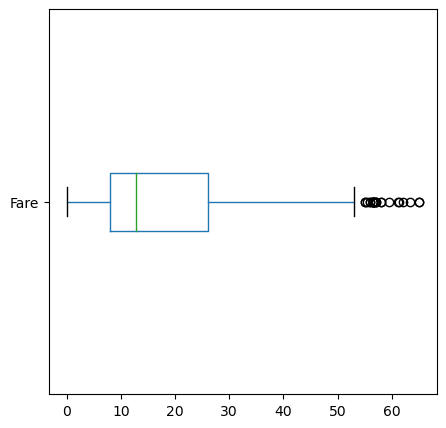

In [55]:
df_titanic4.boxplot(column=['Fare'],fontsize=10,rot=0,grid=False,figsize=(5,5),vert=False)
plt.show()

In [56]:
df_titanic4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 893
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  769 non-null    object 
 1   Survived     769 non-null    int64  
 2   Pclass       769 non-null    int64  
 3   Name         769 non-null    object 
 4   Sex          769 non-null    object 
 5   Age          769 non-null    float64
 6   SibSp        769 non-null    int64  
 7   Parch        769 non-null    int64  
 8   Ticket       769 non-null    object 
 9   Fare         768 non-null    float64
 10  Cabin        769 non-null    object 
 11  Embarked     769 non-null    object 
 12  ship         769 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 84.1+ KB


### Manipulating string / repairing the dataset

In [57]:
df_titanic4.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.50,Unknown,S,Titanic
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.05,Unknown,S,Titanic
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.12,Unknown,Q,Titanic
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,Unknown,S,Titanic
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.0,0,0,112053,30.00,B42,S,Titanic
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.45,Unknown,S,Titanic
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Titanic
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Unknown,Q,Titanic
892,1143,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,16.70,G6,S,Titanic
893,-12,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,1.0,0,0,350406,7.85,Unknown,S,Titanic


In [58]:
df_titanic4[df_titanic['Sex'].str.contains('F')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
774,775,1,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",Female,54.0,1,3,29105,23.0,Unknown,S,Titanic
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.0,0,0,112053,30.0,B42,S,Titanic


In [59]:
df_titanic4['Sex'] = df_titanic4['Sex'].str.replace('F','Female')

In [60]:
df_titanic4['Sex'] = df_titanic4['Sex'].str.title()
df_titanic4.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
883,884,0,2,"Banfield, Mr. Frederick James",Male,28.0,0,0,C.A./SOTON 34068,10.50,Unknown,S,Titanic
884,885,0,3,"Sutehall, Mr. Henry Jr",Male,25.0,0,0,SOTON/OQ 392076,7.05,Unknown,S,Titanic
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",Female,39.0,0,5,382652,29.12,Unknown,Q,Titanic
886,887,0,2,"Montvila, Rev. Juozas",Male,27.0,0,0,211536,13.00,Unknown,S,Titanic
887,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,0,0,112053,30.00,B42,S,Titanic
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,0.0,1,2,W./C. 6607,23.45,Unknown,S,Titanic
889,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,0,0,111369,30.00,C148,C,Titanic
890,891,0,3,"Dooley, Mr. Patrick",Male,32.0,0,0,370376,7.75,Unknown,Q,Titanic
892,1143,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",Female,4.0,1,1,PP 9549,16.70,G6,S,Titanic
893,-12,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",Female,1.0,0,0,350406,7.85,Unknown,S,Titanic


In [61]:
df_titanic4[df_titanic4['PassengerId'].str.contains('-')]

#I decided not to change the Passenger Id : -12 because there is another value already with the same id (12).

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
893,-12,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",Female,1.0,0,0,350406,7.85,Unknown,S,Titanic


In [62]:
df_titanic4[df_titanic4['PassengerId'].str.contains('12')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
11,12,1,1,"Bonnell, Miss. Elizabeth",Female,58.0,0,0,113783,26.55,C103,S,Titanic
111,112,0,3,"Zabour, Miss. Hileni",Female,14.0,1,0,2665,14.45,Unknown,C,Titanic
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",Female,2.0,4,2,347082,31.28,Unknown,S,Titanic
121,122,0,3,"Moore, Mr. Leonard Charles",Male,0.0,0,0,A4. 54510,8.05,Unknown,S,Titanic
122,123,0,2,"Nasser, Mr. Nicholas",Male,32.0,1,0,237736,30.07,Unknown,C,Titanic
123,124,1,2,"Webber, Miss. Susan",Female,32.0,0,0,27267,13.00,E101,S,Titanic
125,126,1,3,"Nicola-Yarred, Master. Elias",Male,12.0,1,0,2651,11.24,Unknown,C,Titanic
126,127,0,3,"McMahon, Mr. Martin",Male,0.0,0,0,370372,7.75,Unknown,Q,Titanic
127,128,1,3,"Madsen, Mr. Fridtjof Arne",Male,24.0,0,0,C 17369,7.14,Unknown,S,Titanic
128,129,1,3,"Peter, Miss. Anna",Female,0.0,1,1,2668,22.36,F E69,C,Titanic


In [63]:
df_titanic4['PassengerId'].value_counts()

1      1
452    1
593    1
594    1
595    1
      ..
296    1
297    1
299    1
301    1
-12    1
Name: PassengerId, Length: 769, dtype: int64

#### divide the name and the title

In [ ]:
df_titanic4['LastName'] = df_titanic4['Name'].str.split().str[0]
df_titanic4['FirstName'] = df_titanic4['Name'].str.split().str[2]
df_titanic4['Title'] = df_titanic4['Name'].str.split().str[1]
df_titanic4.tail(10)

In [71]:
df_titanic4['LastName'] = df_titanic4['LastName'].str.replace(',','')
df_titanic4.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship,LastName,FirstName,Title
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.25,Unknown,S,Titanic,Braund,Owen,Mr.
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.92,Unknown,S,Titanic,Heikkinen,Laina,Miss.


In [72]:
df_titanic5 = df_titanic4[["PassengerId","Survived","Pclass","Title","FirstName","LastName","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked","ship"]]
df_titanic5.head()

,PassengerId,Survived,Pclass,Title,FirstName,LastName,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,Mr.,Owen,Braund,Male,22.0,1,0,A/5 21171,7.25,Unknown,S,Titanic
2,3,1,3,Miss.,Laina,Heikkinen,Female,26.0,0,0,STON/O2. 3101282,7.92,Unknown,S,Titanic
3,4,1,1,Mrs.,Jacques,Futrelle,Female,35.0,1,0,113803,53.10,C123,S,Titanic
4,5,0,3,Mr.,William,Allen,Male,35.0,0,0,373450,8.05,Unknown,S,Titanic
5,6,0,3,Mr.,James,Moran,Male,0.0,0,0,330877,8.46,Unknown,Q,Titanic


In [73]:
df_titanic5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 0 to 893
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  769 non-null    object 
 1   Survived     769 non-null    int64  
 2   Pclass       769 non-null    int64  
 3   Title        769 non-null    object 
 4   FirstName    769 non-null    object 
 5   LastName     769 non-null    object 
 6   Sex          769 non-null    object 
 7   Age          769 non-null    float64
 8   SibSp        769 non-null    int64  
 9   Parch        769 non-null    int64  
 10  Ticket       769 non-null    object 
 11  Fare         768 non-null    float64
 12  Cabin        769 non-null    object 
 13  Embarked     769 non-null    object 
 14  ship         769 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 112.3+ KB


#### do one more checking for the null values

In [75]:
df_titanic5.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Title          0
FirstName      0
LastName       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
ship           0
dtype: int64

In [76]:
df_titanic5.dropna(axis=0, inplace=True)
df_titanic5.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Title          0
FirstName      0
LastName       0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
ship           0
dtype: int64

In [85]:
df_titanic5['PassengerId'].value_counts()

1      1
3      1
593    1
594    1
595    1
      ..
295    1
296    1
297    1
299    1
-12    1
Name: PassengerId, Length: 768, dtype: int64

### Checking EDA

In [86]:
df_titanic5.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.338542,2.483073,22.756510,0.529948,0.325521,17.747422
std,0.473522,0.730933,17.282207,2.667422,0.737008,13.561695
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,4.000000,0.000000,0.000000,7.900000
50%,0.000000,3.000000,24.000000,0.000000,0.000000,12.765000
75%,1.000000,3.000000,34.000000,1.000000,0.000000,26.000000
max,1.000000,3.000000,74.000000,70.000000,5.000000,65.000000


### Normalization

In [88]:
df_scaled = df_titanic5[["Survived","Pclass","Age","SibSp","Parch","Fare"]]

In [89]:
#df_scaled = df_titanic5.copy()
  
# apply normalization techniques
for column in df_scaled.columns:
    df_scaled[column] = (df_scaled[column] - df_scaled[column].min()) / (df_scaled[column].max() - df_scaled[column].min())    
  
# view normalized data
print(df_scaled)

     Survived  Pclass       Age     SibSp  Parch      Fare
0         0.0     1.0  0.297297  0.014286    0.0  0.111538
2         1.0     1.0  0.351351  0.000000    0.0  0.121846
3         1.0     0.0  0.472973  0.014286    0.0  0.816923
4         0.0     1.0  0.472973  0.000000    0.0  0.123846
5         0.0     1.0  0.000000  0.000000    0.0  0.130154
..        ...     ...       ...       ...    ...       ...
888       0.0     1.0  0.000000  0.014286    0.4  0.360769
889       1.0     0.0  0.351351  0.000000    0.0  0.461538
890       0.0     1.0  0.432432  0.000000    0.0  0.119231
892       1.0     1.0  0.054054  0.014286    0.2  0.256923
893       0.0     1.0  0.013514  0.000000    0.0  0.120769

[768 rows x 6 columns]


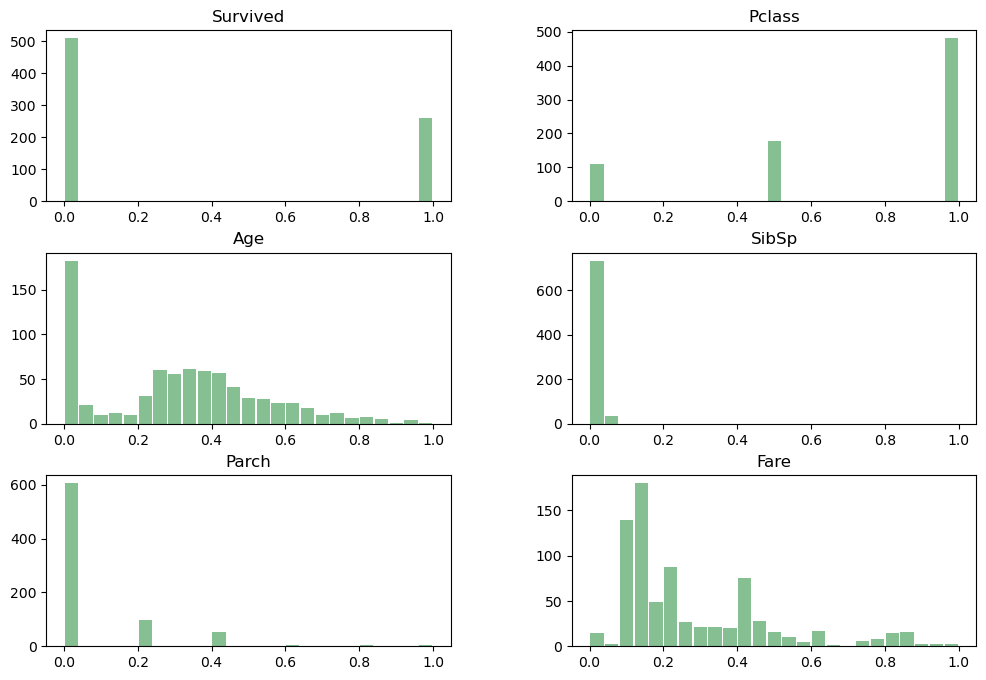

In [101]:
df_scaled.hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()